In [1]:
###PmP FORECAST using moving average method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pmp= pd.read_excel('PMP.xls')
pmp['Date'] = pd.to_datetime(pmp['Date'])
pmp
pmp.head(10)

,Date,Councellor Name,Course Type,Fees Total,Fees Received,Fees Pending
0,2020-11-01,Vineeta,PMP,6750,6750,0
1,2020-11-01,Vineeta,PMP,7500,7500,0
2,2020-11-01,Vineeta,PMP,7500,3500,4000
3,2020-11-01,Tarun,PMP,7500,7500,0
4,2020-11-01,Naveen,CDTP,5000,5000,0
5,2020-11-01,Vineeta,PMP,8750,8750,0
6,2020-11-01,Vineeta,PMP +,25937,25937,0
7,2020-11-01,Vineeta,PMP,8000,8000,0
8,2020-12-01,Vineeta,PMP,12000,12000,0
9,2020-12-01,Vineeta,PMP,10000,10000,0


In [3]:
pmp.shape


(193, 6)

In [4]:

pmp.columns

Index(['Date', 'Councellor Name', 'Course Type', 'Fees Total', 'Fees Received',
       'Fees Pending'],
      dtype='object')

In [5]:
pmp['Councellor Name'].value_counts()

Vineeta       146
Deepti         13
Bhoomika        8
Samreen         8
Ankit           3
Komal           3
Tarun           3
Akansha         2
Abhishek C      2
akansha         1
Naveen          1
Vidushi         1
komal           1
Manish          1
Name: Councellor Name, dtype: int64

In [6]:
pmp['Date'].value_counts()

2021-06-01    40
2021-05-01    32
2021-07-01    27
2021-02-01    26
2021-04-01    21
2021-03-01    17
2021-01-01    15
2020-11-01     8
2020-12-01     7
Name: Date, dtype: int64

In [7]:
pmp['Course Type'].value_counts()

PMP                              105
IFRS                              14
CAPM                               9
Design Thinking                    8
RPA                                6
Agile                              4
Business Intelligence              4
SSGB                               3
CATP                               2
PMP LMS                            2
PMP+                               2
PMC                                2
teen MBA                           1
BA With [python                    1
PMP+Agile                          1
Technical writing                  1
CMLP                               1
Advn Excel                         1
Design Thinking + 5S               1
PMP+BB                             1
PMP+SAP-FICO+GST                   1
PMP & Agile                        1
IFRS +FSA                          1
GB + PMP                           1
Hr Generalist                      1
AI                                 1
PMP +BB                            1
P

In [8]:
pmp.describe()

,Fees Total,Fees Received,Fees Pending
count,193.000000,193.000000,193.000000
mean,12378.088083,11992.730570,385.357513
std,7373.067023,7424.679221,1742.974807
min,3000.000000,2000.000000,0.000000
25%,8670.000000,8670.000000,0.000000
50%,11900.000000,11500.000000,0.000000
75%,13500.000000,13500.000000,0.000000
max,65000.000000,65000.000000,15525.000000


In [9]:
###represent month in date field as its first day
pmp['Date'] = pmp['Date'].dt.year.astype('str') + '-' + pmp['Date'].dt.month.astype('str') + '-01'
pmp['Date'] = pd.to_datetime(pmp['Date'])
pmp1 = pmp.groupby('Date')['Fees Total','Fees Received','Fees Pending'].agg([np.sum])
pmp2 = pmp.groupby('Course Type')['Fees Total','Fees Received','Fees Pending'].agg([np.sum])

In [10]:
pmp1


,Fees Total,Fees Received,Fees Pending
,sum,sum,sum
Date,,,
2020-11-01,76937,72937,4000
2020-12-01,73750,65000,8750
2021-01-01,157882,157882,0
2021-02-01,296299,287399,8900
2021-03-01,208935,208935,0
2021-04-01,242155,225405,16750
2021-05-01,392414,379415,12999
2021-06-01,469754,446779,22975


In [11]:

pmp2

,Fees Total,Fees Received,Fees Pending
,sum,sum,sum
Course Type,,,
AI,15000,15000,0
Advn Excel,8550,8550,0
Agile,23500,23500,0
BA With [python,13500,13500,0
Blockchain Course,15000,15000,0
Business Intelligence,48000,48000,0
CAPM,57375,54375,3000
CAPM + GB,20000,20000,0


In [12]:
writer = pd.ExcelWriter('pmp.xlsx', engine='xlsxwriter')
pmp1.to_excel(writer, sheet_name='sheet1')
pmp2.to_excel(writer, sheet_name='sheet2')
writer.save()

In [13]:
df1=pd.read_excel('pmp edit.xlsx',sheet_name='sheet1',index_col='Date',parse_dates=True)
df1

,Fees Total,Fees Received,Fees Pending
Date,,,
2020-11-01,76937,72937,4000
2020-12-01,73750,65000,8750
2021-01-01,157882,157882,0
2021-02-01,296299,287399,8900
2021-03-01,208935,208935,0
2021-04-01,242155,225405,16750
2021-05-01,392414,379415,12999
2021-06-01,469754,446779,22975
2021-07-01,470845,470845,0


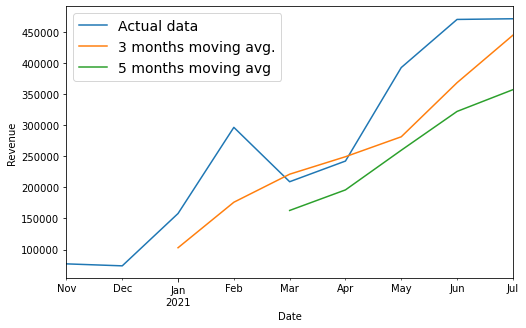

In [19]:
df1["Fees Total"].plot(figsize=(8,5),xlabel='Date',ylabel='Revenue')
df1["Fees Total"].rolling(window= 3).mean().plot(figsize=(8,5), label= "3M MA")
df1["Fees Total"].rolling(window= 5).mean().plot(figsize=(8,5), label= "5M MA")
plt.legend(loc=2)
plt.legend(labels =['Actual data', '3 months moving avg.','5 months moving avg'], fontsize=14)

In [20]:
df1["3 Months MA"]= df1["Fees Total"].rolling(window= 3).mean().shift()
df1["3 Months MA"]
df1["5 Months MA"]= df1["Fees Total"].rolling(window= 5).mean().shift()
df1["5 Months MA"]
df1.describe()

,Fees Total,Fees Received,Fees Pending,3 Months MA,5 Months MA
count,9.000000,9.000000,9.000000,6.000000,4.000000
mean,265441.222222,257177.444444,8263.777778,233046.222222,235003.300000
std,153538.377079,150636.588789,8174.269215,90737.490754,70499.402894
min,73750.000000,65000.000000,0.000000,102856.333333,162760.600000
25%,157882.000000,157882.000000,0.000000,187242.416667,187543.300000
50%,242155.000000,225405.000000,8750.000000,235084.166667,227670.600000
75%,392414.000000,379415.000000,12999.000000,273158.416667,275130.600000
max,470845.000000,470845.000000,22975.000000,368107.666667,321911.400000
